In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


import를 해준다 특별한 설명은 하지않겠다.
아래에서 보충이 필요한 부분은 ???로 검색 가능하다.

## 1.TensorBoard 및 Tensor Graph

### 1.1 TensorBoard에 관하여

In [6]:
tf.set_random_seed(777)  # for reproducibility

W1 = tf.Variable(tf.random_normal([200, 10], stddev=1.0))
W2 = tf.Variable(tf.random_normal([200, 10], stddev=0.13))
W3 = tf.Variable(tf.random_normal([1], stddev=10))

w1_hist = tf.summary.histogram("weights-stdev_1.0", W1)
w2_hist = tf.summary.histogram("weights-stdev_0.13", W2)
w3_hist = tf.summary.histogram("My_weights_W3", W3)

summary_op = tf.summary.merge_all()

writer = tf.summary.FileWriter("./logs")

sess = tf.Session()



sess.run(tf.global_variables_initializer())#이때 초기화가 된다.

for i in range(100):
    writer.add_summary(sess.run(summary_op),i)

writer.flush()
writer.close()
sess.close()

위 코드는 텐서보드에서 히스토그램을 보는 법을 쉽게 알아보기 위해서 이미 아는 분포, 정규분포를 만들어서 텐서보드에 써본 것이다,다만 여기서는 for을 굳이 넣어서 같은 데이터를 100번 썼는데 그렇게 해야,global_step에 따른 히스토그램의 변화가 보이기 때문이다, 사실 이 글로벌스텝은 스텝에 따라 변하는 변수를 위한 것이기 때문에 위와 같이 한번 초기화하고 바꾸지도않는 분포에서는 별 필요가 없다, 그래서 아래처럼 쓸 수 있다.


In [7]:
writer = tf.summary.FileWriter("./logs")
sess = tf.Session()
sess.run(tf.global_variables_initializer())#이때 초기화가 된다.

writer.add_summary(sess.run(summary_op),1)

writer.flush()
writer.close()
sess.close()

다른건 달라진게 없고 딱 for만 없애줬다, 이렇게 하면 딱 한번 기록되기 때문에 distribution에서는 보이지도 않는다. 참고로 텐서보드는 위와 같이 한 다음에 터미널에서 tensorboard --logdir=./logs를 입력해주면 된다. --logdir= 여기서 등호 오른쪽에는 텐서보드 파일이 있는 경로를 적어주면 된다.
참고로 ./logs에서 ./은 상대경로라고 해야되나, 지금 파일이 저장된 폴더까지의 경로를 말해준다. 즉 저렇게 적으면 코드파일이 들어있는 폴더에 logs라는 폴더를 만들어서 그 안에 텐서보드 파일을 넣는다.
-스칼라 사용법,텐서플로우(그래프)사용법을 작성하지 않았다.

### 1.2 what tf.identity is used for?, 그리고 Tensorflow에서 Tensor Graph에 관하여

In [3]:
import tensorflow as tf
import numpy as np

In [10]:
a=tf.Variable([1,2,3])
print(a)
b=a
print(b)
a=tf.Variable([15])
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(a))
    print(sess.run(b))
print("===================We will try case1====================")
a=tf.constant([1,2,3])
print(a)
b=tf.identity(a)
print(b)
a=tf.constant([15])
with tf.Session() as sess:
    print(sess.run(a))
    print(sess.run(b))
    
print("===================We will try case2====================")
a=tf.Variable([1,2,3])
print(a)
b=tf.identity(a)
print(b)
a=tf.Variable([15])
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(a))
    print(sess.run(b))
print("===================We will try another case3====================")
a=tf.Variable([1,2,3])
print(a)
b=tf.identity(a)
print(b)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.assign(a,[9,9,9]))
    print(sess.run(a))
    print(sess.run(b))
"""
아래의 코드실행결과에서 알 수 있듯이
constant든 variable이든 identity는 그걸 복사하여 b에 넣어주었다. 그리고 a를 바꾸면 잘바뀐다
그런데 사실 어차피 a에 아예 새로운 텐서를 넣을거면 그냥 b=a해도 잘된다. assign으로 바꿀거면 b=a하든 b=tf.identity(a)하든 똑같이 안된다
흠..그러면 도대체 tf.identity의 역할은 무엇일까? 아래를 보자
"""

<tf.Variable 'Variable_10:0' shape=(3,) dtype=int32_ref>
<tf.Variable 'Variable_10:0' shape=(3,) dtype=int32_ref>
[15]
[1 2 3]
===================We will try case1====================
Tensor("Const_16:0", shape=(3,), dtype=int32)
Tensor("Identity_14:0", shape=(3,), dtype=int32)
[15]
[1 2 3]
===================We will try case2====================
<tf.Variable 'Variable_12:0' shape=(3,) dtype=int32_ref>
Tensor("Identity_15:0", shape=(3,), dtype=int32)
[15]
[1 2 3]
===================We will try another case3====================
<tf.Variable 'Variable_14:0' shape=(3,) dtype=int32_ref>
Tensor("Identity_16:0", shape=(3,), dtype=int32)
[9 9 9]
[9 9 9]


'\n아래의 코드실행결과에서 알 수 있듯이\nconstant든 variable이든 identity는 그걸 복사하여 b에 넣어주었다. 그리고 a를 바꾸면 잘바뀐다\n그런데\n'

1)Return a tensor with the same shape and contents as the input tensor or value.
2)복사한 중간 계산 결과 값을 이용하므로 네트워크의 부담을 줄일 수 있다

In [35]:
import tensorflow as tf

x = tf.Variable(0.0)
x_plus_1 = tf.assign_add(x, 1) # x_plus_1 = (x = x + 1)

with tf.control_dependencies([x_plus_1]):
    y = tf.identity(3*x)
init = tf.global_variables_initializer()
#tensorflow는 expression parser, 위에서 y는 아직 variable이 아니다.
with tf.Session() as session:
    init.run()
    for i in range(5):
        print(y.eval())
        # print(x_plus_1.eval()) 

<class 'tensorflow.python.framework.ops.Tensor'>
3.0
6.0
9.0
12.0
15.0


여러개의 Gpu,cpu가 서로 데이터를 주고 받을 때 쓰기도 한다. 하지만 내가 써놓은 예제와 아래 상황에서는 그저 flow를 조금 컨트롤하는 용도로 쓰인다.
with tf.control_dependencies([loss_averages_op]): 안에서 아무것도 안하고 y=x 이런 식으로 해놓으면 flow control이 작동을 안한다고 한다, 무언가 텐서를 넣어줘야하고 그 적당한 텐서로 tf.identity를 쓰는 듯 하다.

In addition, tf.identity can be used used as a dummy node to update a reference to the tensor. This is useful with various control flow ops. In the CIFAR case we want to enforce that the ExponentialMovingAverageOp will update relevant variables before retrieving the value of the loss. This can be implemented as:

with tf.control_dependencies([loss_averages_op]):
  total_loss = tf.identity(total_loss)

Here, the tf.identity doesn't do anything useful aside of marking the total_loss tensor to be ran after evaluating loss_averages_op.

In [25]:
x = tf.Variable(2)
new_x = x.assign_add(10)
y = x
#원래대로라면 y를 실행 할 때 new_x를 들릴 필요가 없다, 그런데 아래 두 줄을 이용해 y=x라는 연산이 일어나기 전에 꼭 new_x를 들리도록 강제한다.
with tf.control_dependencies([new_x]):
    y = tf.identity(x)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
result = sess.run(y)
print(result)


12


### 1.3 tf.cond

In [22]:
x = tf.constant(2)
y = tf.constant(5)
def f1(): return tf.multiply(x, 17)
def f2(): return tf.add(y, 23)
r = tf.cond(tf.less(x, y), f1, f2)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    init.run()
    sess.run(r)
    print(r.eval())

34


### 1.4 About tf.gradients() and RegisterGradient()

In [7]:
"""
인터넷에 가면 이에 대해 아래와 같은 설명이 있다
gradients(
    ys,
    xs,
    grad_ys=None,
    name='gradients',
    colocate_gradients_with_ops=False,
    gate_gradients=False,
    aggregation_method=None
)
ys and xs are each a Tensor or a list of tensors. grad_ys is a list of Tensor, holding the gradients received by the ys. 
The list must be the same length as ys.
gradients() adds ops to the graph to output the partial derivatives of ys with respect to xs. 
It returns a list of Tensor of length len(xs) where each tensor is the sum(dy/dx) for y in ys.
grad_ys is a list of tensors of the same length as ys that holds the initial gradients for each y in ys. 
When grad_ys is None, we fill in a tensor of '1's of the shape of y for each y in ys. 
A user can provide their own initial grad_ys to compute the derivatives using a different initial gradient for each y 
(e.g., if one wanted to weight the gradient differently for each value in each y).

즉 ys를 xs에 대하여 미분한 값을 반환하는 텐서이다. grad_ys는 미분값의 초기값, 따로 설정을 안하면 1로,
미분값에 초기값이라는건 마지막에 이 초기값을 곱해서 최종결과를 얻는다는 것다.
"""
"""
아래는 이거 정리하기 전에 내가 스크랩 해놨던 코드
@tf.RegisterGradient("CustomGrad")

def _const_mul_grad(unused_op, grad):
    return 5.0 * grad

g = tf.get_default_graph()
with g.gradient_override_map({"Identity": "CustomGrad"}):
    output = tf.identity(input, name="Identity")
"""
import tensorflow as tf

a=tf.constant(3)
b=3*a+2
c=tf.gradients(b,a)
d=tf.gradients(b,a,1)
e=tf.gradients(b,a,2)
with tf.Session() as sess:
    print(sess.run(c))
    print(sess.run(d))
    print(sess.run(e))

[3]
[3]
[6]


마지막 텐서 e를 실행한 결과에서 grad_ys가 dys/dxs 에 곱해졌다는걸 알 수 있다.
즉 backpropagation을 할 때 전레이어까지의 propagation 결과를 이용 할 때 쓰는 녀석이다.

In [4]:
"""
tf.RegisterGradient()라는 함수가 있다, 특정 이름을 가진 grad함수를 등록하는 것이다, 어딘가에 등록을 하면 만약 rnd_name이라는 이름으로 등록했다면
with g.gradient_override_map({"PyFunc": rnd_name}):
    ~~~~
이런 식으로 쓰게된다.

@tf.RegisterGradient(이름)
def ~~~
    ~~~~
이렇게 하면 @아래 줄 함수를 저 이름으로 등록하는거고
tf.RegisterGradient(이름)(함수) 로 쓸수도 있다. 즉 @는 약간~ with 같은 느낌?

남은 의문은 저렇게 gradient에 등록 된 이름은 무엇무엇이 있을까?
"""

import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
tf.reset_default_graph()
def addone(x):
    # print(type(x)
    return x + 1

def addone_grad(op, grad):
    x = op.inputs[0]
    return grad
"""
op는 이 grad function이 배정 될 함수를 가르킨다.
op.inputs[0],op.inputs[1] 은 각각 op의 첫번째 인자, 두번째 인자를 가르킨다.
grad는 이 함수 전까지 모인 grad를 말한다. return grad 한다는건 그대로 보내준다는 것 즉 op의 gradient는 1이라는 말이다.

아래와 같은 함수의 정의도 가능하다.
"""

def np_mod(x,y):
    return (x % y).astype(np.float32)    
#위 함수는 사실 미분이 정의되지않았지, 나머지 구하는 연산이니까.
def modgrad(op, grad):
    x = op.inputs[0] # the first argument (normally you need those to calculate the gradient, like the gradient of x^2 is 2x. )
    y = op.inputs[1] # the second argument
    return grad * 1, grad * tf.neg(tf.floordiv(x, y)) #the propagated gradient with respect to the first and second argument respectively
#첫번째 인자 x, 두번째 인자 y에 대하여 각각 gradient를 정의해준다. 주의: 위의 np_mod는 아래 세션에서 쓰지않는다.

# Define custom py_func which takes also a grad op as argument:
def py_func(func, inp, Tout, stateful=True, name=None, grad=None):

    # Need to generate a unique name to avoid duplicates:
    rnd_name = 'PyFuncGrad' + str(np.random.randint(0, 1E+8))

    tf.RegisterGradient(rnd_name)(grad)  # see _MySquareGrad for grad example
    g = tf.get_default_graph()
    with g.gradient_override_map({"PyFunc": rnd_name}):
        return tf.py_func(func, inp, Tout, stateful=stateful, name=name)
#위 함수는 gradient의 적용을 받은 py_func함수를 반환한다.
#py_func는 파이썬 함수를 텐서로 바꿔주는건데 grad가 없으니까 위처럼 정의해주는 것이다.
#https://stackoverflow.com/questions/39048984/tensorflow-how-to-write-op-with-gradient-in-python

# create data
x_data = tf.placeholder(dtype=tf.float32, shape=[None])
y_data = tf.placeholder(dtype=tf.float32, shape=[None])

w = tf.Variable(5.)
b = tf.Variable(0.1)

y1 = tf.multiply(w, x_data, name='y1')
y2 = py_func(addone, [y1], [tf.float32], grad=addone_grad)[0]
y = tf.add(y2, b)

loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

print("Pyfunc grad", ops.get_gradient_function(y2.op))
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(100):
        #            ran = np.random.rand(115).astype(np.float32)
        ran = np.ones((15)).astype(np.float32)
        ans = ran * 2 + 3
        dic = {x_data: ran, y_data: ans}
        print('step {}'.format(step))
        print('{}, {}'.format(w.eval(), b.eval()))
        tt, yy, yy1= sess.run([train, y1, y2], feed_dict=dic)
        if step % 1 == 0:
            print('step {}'.format(step))
            print('{}, {}'.format(w.eval(), b.eval()))

    test = sess.run(y, feed_dict={x_data:[1]})
    print('test = {}'.format(test))


Pyfunc grad <function addone_grad at 0x7efb80356e18>
step 0
5.0, 0.10000000149011612
step 0
4.978000164031982, 0.07800000160932541
step 1
4.978000164031982, 0.07800000160932541
step 1
4.95688009262085, 0.05687999352812767
step 2
4.95688009262085, 0.05687999352812767
step 2
4.936604976654053, 0.03660479187965393
step 3
4.936604976654053, 0.03660479187965393
step 3
4.917140960693359, 0.017140593379735947
step 4
4.917140960693359, 0.017140593379735947
step 4
4.8984551429748535, -0.0015450343489646912
step 5
4.8984551429748535, -0.0015450343489646912
step 5
4.88051700592041, -0.019483238458633423
step 6
4.88051700592041, -0.019483238458633423
step 6
4.8632965087890625, -0.036703918129205704
step 7
4.8632965087890625, -0.036703918129205704
step 7
4.84676456451416, -0.053235769271850586
step 8
4.84676456451416, -0.053235769271850586
step 8
4.8308939933776855, -0.0691063404083252
step 9
4.8308939933776855, -0.0691063404083252
step 9
4.815658092498779, -0.0843420922756195
step 10
4.81565809249

### 1.5 tf.GraphKeys

In [6]:
"""
아주 유용한 녀석이다.
일단 tf.GraphKeys. 안에 기본적으로 저장 된 키들이 있는데 변수,update_ops,Weights,Activation 등이 있다. 이걸 어디에 쓰냐고?
놀랍게도 같은 그래프에 속한다면 언제든지 이걸 이용해서 원하는걸 받을 수 있다. 함수인자 전달 없이도..
"""
import tensorflow as tf
tf.reset_default_graph()
from tensorflow.contrib.framework import get_name_scope

with tf.name_scope("Stage1") as name:
    with tf.name_scope("Stage2"):
        w=tf.Variable(1,'Myweight')
        tf.add_to_collection('Myset',w)
print(w)
print("No filter:",tf.get_collection('Myset'))
print("Bad filter:",tf.get_collection('Myset',scope='Stage2'))
print("Valid filter:",tf.get_collection('Myset',scope='Stage1_'))

"""
위 코드에서 두가지 사실을 알 수 있다.
1)add_to_collection에서 Key부분에는 임의의 문자열이 들어갈 수 있다
2)get_collection에서 Key로 collection을 호출 할 때, scope(일종의 필터다)를 지정 할 수 있는데 이 필터가 몹시 답답한 것이 이름을
앞에서부터 매칭해서 틀리면 바로 제외시킨다. Stage2 같이 중간에 들어간 문자열은 제대로 된 필터로 기능하지 않는다.
->한 콜렉션에서 다양한 다른 집합에 접근하고싶다면 key를 다르게 하는 것이 정신건강에 좋아보인다.

아래의 함수를 이용하여 스코프의 이름을 알 수 있고, 그러면 같은 스코프에서 정의 된 어떤 변수를 접근 할 수 있게되겠지?
"""
with tf.name_scope("Stage1"):
    with tf.name_scope("Stage2"):
        print("Scope name:",get_name_scope())
        print("Scope name:",tf.get_variable_scope())
        
with tf.variable_scope("Stage1"):
    with tf.variable_scope("Stage2"):
        w=tf.get_variable("Hi",1)
        print(w)
with tf.variable_scope("Stage1"):
    with tf.variable_scope("Stage2"):
        w=tf.get_variable("Hi2",1)
        #w=tf.get_variable("Hi",1)
        print(w)
with tf.variable_scope("Stage1",reuse=True):   #Reuse는 예전에 만들었던거 불러와서 쓴다는 이야기다. 여기서 새로운거 즉 앞에서 선언안한거 쓰려고 하면 오류
    with tf.variable_scope("Stage2"):          #위에서는 Reuse 안썼으니까 있던거 쓰면 오류 난다. 각각 create mode scope, reuse mode scope    
        w=tf.get_variable("Hi",1)
        #w2=tf.get_variable("Hi3",1)
        print(w)


<tf.Variable 'Stage1/Stage2/Variable:0' shape=() dtype=int32_ref>
No filter: [<tf.Variable 'Stage1/Stage2/Variable:0' shape=() dtype=int32_ref>]
Bad filter: []
Valid filter: []
Scope name: Stage1_1/Stage2
Scope name: <tensorflow.python.ops.variable_scope.VariableScope object at 0x7f29020e29e8>
<tf.Variable 'Stage1/Stage2/Hi:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'Stage1/Stage2/Hi2:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'Stage1/Stage2/Hi:0' shape=(1,) dtype=float32_ref>


## 2. 파이썬 내장 함수
### 2.1 enumerate, reshape,plt.imshow,Filter of CNN

(1, 3, 3, 1)


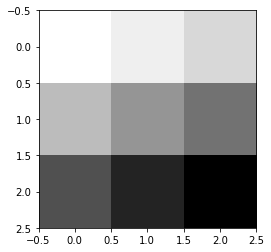

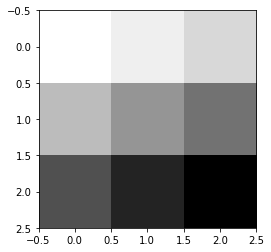

In [15]:
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys')
plt.show()
plt.imshow(image.reshape(3,3), cmap='Greys')
plt.show()
plt.show()



1)InteractiveSession()은 무엇인가???
2)image를 저렇게 만들었다, reshape를 쓰면 똑똑하게 저절로 쉐잎을 바꿔준다 
이 image는 아래에서 cnn에 쓰인다.
3)plt.show()는 방금 imshow에 들어간걸 출력한다. 그리고 한번 출력하고나면 없어진다.


In [49]:
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID')
conv2d_img = conv2d.eval()

print("Type of conv2d:{0:<55}".format(str(type(conv2d))),"Shape of conv2d:{0:<60}".format(str(conv2d.shape)))
print("Type of conv2d_img:{0:<51}".format(str(type(conv2d_img))),"Shape of conv2d_img:{0:<60}".format(str(conv2d_img.shape)))
print("Shape of weight:", weight.shape)


Type of conv2d:<class 'tensorflow.python.framework.ops.Tensor'>        Shape of conv2d:(1, 2, 2, 1)                                                
Type of conv2d_img:<class 'numpy.ndarray'>                             Shape of conv2d_img:(1, 2, 2, 1)                                                
Shape of weight: (2, 2, 1, 1)


1)컨볼루션레이어를 저렇게 안쓰고 layer API를 사용하여 구성할 수도 있다.
image (a,b,c,d) 에서 a는 입력 image의 수, b,c는 입력이미지의 가로세로픽셀, d는 입력이미지의 depth를 나타낸다 여기서 depth는 예를 들어 grayscale이면 1, RGB면 3이 된다. 그리고 컨볼루션레이어를 지나가면 예를 들어 filter가 16개인 레이어를 지나가면 depth는 16이 된다. 
filter (a,b,c,d)에서 a,b,c는 차례대로 filter의 가로세로픽셀, 그리고 depth이며,마지막 d는 filter의 갯수이다.
그래서 만약
image.shape (10,28,28,3) 이 filter 16개인 컨볼루션 레이어(padding='same')를 지나갈 때, filter.shape (2,2,3,16) 이며
출력은 image.shape (10,28,28,16)이 된다.
2)conv2d.eval() 을 쓰면 데이터를 array형으로 반환해준다.

In [45]:
print(conv2d_img)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
print(conv2d_img)

[[[[ 12.]
   [ 16.]]

  [[ 24.]
   [ 28.]]]]
[[[[ 12.]
   [ 16.]]

  [[ 24.]
   [ 28.]]]]


In [51]:
for i, one_img in enumerate(conv2d_img):
    print(i)
    print("one_img:", "shape:", one_img.shape, "type:", type(one_img))
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')
a=['김','민','경']
for i, two_test in enumerate(a):
    print(i,two_test)


0
one_img: shape: (2, 2, 1) type: <class 'numpy.ndarray'>
[[ 12.  16.]
 [ 24.  28.]]
0 김
1 민
2 경


1)conv2d_img는 (1,2,2,1)이였으나 enumerate에 들어가면서 한개씩 반환되므로 (2,2,1)이 one_img에 반환되었고, i는 index이다.

### 2.2 range, append

In [65]:
print("Range(-5,5):  ",end='')
for i in range(-5,5):
    print(i,' ',end='')
print("")
print("Range(5):      ",end='')
for i in range(5):
    print(i,' ',end='')
print("")
print("Range(-5,5,2):",end='')
for i in range(-5,5,2):
    print(i,' ',end='')

Range(-5,5):  -5  -4  -3  -2  -1  0  1  2  3  4  
Range(5):      0  1  2  3  4  
Range(-5,5,2):-5  -3  -1  1  3  

In [76]:
X=[]
Y=[]
Z=[]
for i in range(-10,10):
    X.append(i)
    Z.append(3*i)
    Y.append(pow(i,2))
print(X)
print(Z)
print(Y)

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[-30, -27, -24, -21, -18, -15, -12, -9, -6, -3, 0, 3, 6, 9, 12, 15, 18, 21, 24, 27]
[100, 81, 64, 49, 36, 25, 16, 9, 4, 1, 0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


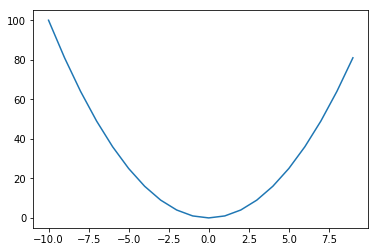

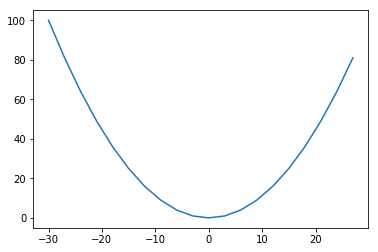

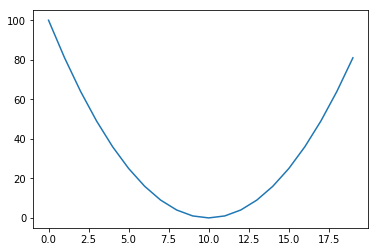

In [78]:
plt.plot(X,Y)
plt.show()    #x축은 같은 index값의 X가 된다.
plt.plot(Z,Y)
plt.show()   #x축은 같은 index값의 Z가 된다.
plt.plot(Y)
plt.show()  #x축은 index값이 된다

위 코드를 통해 append는 어떻게 쓰는지, 그리고 plt.plot과 plt.show는 어떻게 쓰는지 알 수 있다.

### 2.3 dir:메서드를 보여준다

In [1]:
print(dir([1,2,3]))


['__add__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']


dir은 객체가 자체적으로 가지고 있는 변수나 관련 함수(메서드)를 보여 준다. 

### 2.4 np.eye, hstack

In [5]:
np.eye(10)

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [5]:
#위의 저걸 왜 썼나 했더니 저걸로 one hot encoding이 된다
print(np.eye(10)[[3,6,9]])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [37]:
a=np.array([1,2,3,4])
b=np.array(['a','b','c','d'])
c=np.array([[1],[2],[3]])
d=np.array([['a'],['b'],['c']])
print((a,b))
print(np.hstack((a,b)))
print((c,d))
print(np.hstack((c,d)))
print("#"*30)
#columnwise, 행렬로 만들었을 때 첫 행부터 읽어나가며 array로 만든다.
#뭐야 이거 결국 여러개 array붙여서 행렬 만드는거 아님?
a=np.array([[1,2,3,4],[5,6,7,8]])
b=np.array([['a','b','c','d'],['e','f','g','h']])
print((a,b))
print(np.hstack((a,b)))
print(np.hstack((a,b)).shape)
#리스트도 된다~
a=[1,2,3,4]
b=['a','b','c','d']
print((a,b))
print(np.hstack((a,b)))


(array([1, 2, 3, 4]), array(['a', 'b', 'c', 'd'],
      dtype='<U1'))
['1' '2' '3' '4' 'a' 'b' 'c' 'd']
(array([[1],
       [2],
       [3]]), array([['a'],
       ['b'],
       ['c']],
      dtype='<U1'))
[['1' 'a']
 ['2' 'b']
 ['3' 'c']]
##############################
(array([[1, 2, 3, 4],
       [5, 6, 7, 8]]), array([['a', 'b', 'c', 'd'],
       ['e', 'f', 'g', 'h']],
      dtype='<U1'))
[['1' '2' '3' '4' 'a' 'b' 'c' 'd']
 ['5' '6' '7' '8' 'e' 'f' 'g' 'h']]
(2, 8)
([1, 2, 3, 4], ['a', 'b', 'c', 'd'])
['1' '2' '3' '4' 'a' 'b' 'c' 'd']


Stack arrays in sequence horizontally (column wise).

Take a sequence of arrays and stack them horizontally to make a single array. 

In [29]:
#We can use this function to flatten some array
a=np.array([[1],[2],[3]])
b=np.hstack(a)
print("a:",a)
print("b:",b)
print("shape of a:",a.shape,"shape of b:",b.shape)

c=np.array([1,2,3])
print("shape of c:",c.shape)

d=a.reshape(3,)
print("shape of d:",d.shape)

a: [[1]
 [2]
 [3]]
b: [1 2 3]
shape of a: (3, 1)  shape of b: (3,)
shape of c: (3,)
shape of d: (3,)


### 2.5 binomial 베르누이 분포, 확률분포

In [46]:
np.random.binomial(4,0.3,(10,10))

array([[2, 2, 2, 0, 1, 2, 2, 1, 2, 2],
       [1, 3, 1, 0, 1, 0, 1, 2, 1, 1],
       [2, 2, 2, 1, 1, 1, 0, 2, 1, 0],
       [2, 3, 1, 0, 0, 1, 0, 1, 2, 0],
       [1, 1, 2, 2, 0, 2, 0, 0, 3, 3],
       [1, 2, 2, 1, 1, 1, 1, 2, 1, 0],
       [1, 2, 1, 0, 2, 0, 1, 1, 2, 1],
       [2, 2, 2, 1, 0, 1, 2, 2, 2, 1],
       [0, 1, 0, 2, 1, 1, 1, 0, 1, 2],
       [0, 1, 0, 2, 1, 1, 0, 1, 1, 1]])

매개변수 n,p,size
n은 한번 실험 할 때 던지는 동전의 횟수, p는 그 동전이 앞면이 나올 확률, size는 이러한 실험을 반복하는 횟수
출력은 n번의 try 중에서 몇번이나 앞면이 나왔는지를 나타낸다.
만약 size를 키우면, n일 때의 베르누이 확률 분포를 근사할 수 있을 것이다.
예를 들어 n=10,p=0.5,size=10000정도 된다면, 확률이 0.5로 10번을 던졌을 때 앞면이 나오는 횟수의 확률분포가 어떻게 될지 대충 근사가 가능할 것이다.

어떤 코드에서는 n=1,p=p0 size=size0 으로 줬는데, 매 원소의 확률에 근거하여 해당 원소를 1로 보낼지 0으로 보낼지를 결정 할 수 있게된다.

Draw samples from a binomial distribution.
Samples are drawn from a binomial distribution with specified parameters, n trials and p probability of success where n an integer >= 0 and p is in the interval [0,1]. (n may be input as a float, but it is truncated to an integer in use)
Parameters:	
n : int or array_like of ints
    Parameter of the distribution, >= 0. Floats are also accepted, but they will be truncated to integers.
p : float or array_like of floats
    Parameter of the distribution, >= 0 and <=1.
size : int or tuple of ints, optional
    Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. If size is None (default), a single value is returned if n and p are both scalars. Otherwise, np.broadcast(n, p).size samples are drawn.

Returns:	

out : ndarray or scalar

    Drawn samples from the parameterized binomial distribution, where each sample is equal to the number of successes over the n trials.


### 2.6 argparse는 무엇인가?

In [6]:
"""
아마도 argparse는 argument parser일거다, 즉 무언가 주장을 조각단위로 받는거다.(참고로 파싱을 한다는건 명령어를 유효한 여러 단위로 나눈다는 말)
나는 지금 파이썬파일을 실행하는데 파이참이라는걸 쓰고있지만 어떤 경우에는 터미널(커맨드라인)에서 직접 바로 실행하기를 원할 수 있다
그때 쓰이는 것이 바로 parser이다. 아래와 같은 방식으로 무엇을 입력으로 어떻게 받을지를 정할 수 있다.
여기서는 특별히 정해져있는거 같지는 않지만 default값을 통해서 파이참 같은 인터프리터에서도 바로 실행가능할 것이다.
"""
import argparse

parser = argparse.ArgumentParser(description='Process some integers.')
parser.add_argument('integers', metavar='N', type=int, nargs='+',
                    help='an integer for the accumulator')
parser.add_argument('--sum', dest='accumulate', action='store_const',
                    const=sum, default=max,
                    help='sum the integers (default: find the max)')

args = parser.parse_args()
print(args.accumulate(args.integers))
#커맨드라인에서의 실행
$ python prog.py -h
usage: prog.py [-h] [--sum] N [N ...]

Process some integers.

positional arguments:
 N           an integer for the accumulator

optional arguments:
 -h, --help  show this help message and exit
 --sum       sum the integers (default: find the max)
#결과    
$ python prog.py 1 2 3 4
4

$ python prog.py 1 2 3 4 --sum
10

SyntaxError: invalid syntax (<ipython-input-6-098d5a95c4a9>, line 19)

### 2.7 flag는 무엇인가?

In [ ]:
"""
argparse와 비슷한 용어로 flag가 있다.
"""

## 3. 딥러닝 다루기
### 3.1 train tensor에서 기울기 수정하기

In [3]:
# Lab 3 Minimizing Cost
# tf Graph Input
X = [1, 2, 3]
Y = [1, 2, 3]
# Set wrong model weights
W = tf.Variable(-5.)
# Linear model
hypothesis = X * W
# Manual gradient
gradient = tf.reduce_mean((W * X - Y) * X) * 2    #미분결과를 직접 써준 것이다.
cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

여기까지는 일반적인 NN과정이다, 코스트함수를 정의해주고,GradientDescent를 이용해서 코스트함수를 최소화하는 웨이트 값을 찾아준다.
하지만 웨이트 값을 구하는 일련의 과정은 train텐서 안에서 일어나서 우리가 weight값을 수정하기가 어렵다.(관찰은 할 수 있나???)

In [5]:
# Get gradients 
# 0831:인자로 코스트함수와 W값을 넣어주면, 코스트함수에서 해당 W일때의 기울기를 반환한다.
# 그러면 다시 그걸 옵티마이저에 넣어주는데, 어떤 상황에서 gvs를 수정할 필요가 있는지는 모르겠다.
gvs = optimizer.compute_gradients(cost, [W])
# Optional: modify gradient if necessary
# gvs = [(tf.clip_by_value(grad, -1., 1.), var) for grad, var in gvs]
# Apply gradients
print(type(gvs)) #gvs는 그냥 리스트이다, cost함수에서 W위치의 기울기와 입력 된 W값을 리스트로 반환한다.
gvs2=[(tf.clip_by_value(grad,-11,1),var) for grad, var in gvs]  #그걸 이런 식으로 수정가능하다
gvs3=[(grad*3+var,var) for grad, var in gvs]                      #리스트는 [1,2,3]*3하면, 똑같은 리스트가 3번 반복될 뿐이다, 저렇게 해줘야한다. 
gvs4=[(grad*3,var*3) for grad, var in gvs]  
print(gvs)
print(gvs2)
print(gvs3)
print(gvs4)
apply_gradients = optimizer.apply_gradients(gvs)
apply_gradients2= optimizer.apply_gradients(gvs3)


<class 'list'>
[(<tf.Tensor 'gradients_2/mul_grad/tuple/control_dependency_1:0' shape=() dtype=float32>, <tf.Variable 'Variable:0' shape=() dtype=float32_ref>)]
[(<tf.Tensor 'gradients_2/mul_grad/tuple/control_dependency_1:0' shape=() dtype=float32>, <tf.Variable 'Variable:0' shape=() dtype=float32_ref>)]
[(<tf.Tensor 'clip_by_value_1:0' shape=() dtype=float32>, <tf.Variable 'Variable:0' shape=() dtype=float32_ref>)]
[(<tf.Tensor 'add_1:0' shape=() dtype=float32>, <tf.Variable 'Variable:0' shape=() dtype=float32_ref>)]
[(<tf.Tensor 'mul_8:0' shape=() dtype=float32>, <tf.Tensor 'mul_9:0' shape=() dtype=float32>)]


위에서 기울기를 뽑아낸게 gvs다, 우리는 gvs를 수정함으로써 다음 스텝에 사용 될 기울기와 웨이트를 수정 할 수 있다.
그러며 옵티마이저는 그 웨이트에서 기울기*Learning rate 값을 업데이트 해줄 것이다.
다만 위에서 보이다시피 웨이트의 자료형은 variable이기 때문에 그걸 지켜줘야한다, 그냥 곱하기를 하면 자료형이 텐서로 바뀌어서 
applyy gradient할 때 오류가 뜬다.

In [127]:
print(type(cost))
print(type(optimizer))
print(type(train))
print(type(apply_gradients))

<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.training.gradient_descent.GradientDescentOptimizer'>
<class 'tensorflow.python.framework.ops.Operation'>
<class 'tensorflow.python.framework.ops.Operation'>


보면 train 과 apply_gradients의 타입이 같다,apply_gradients는 train에서의 업데이트를 마저 끝내는거다.

In [128]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(100):
    #여기서는 실제로 계산한 gradient와 옵티마이저에서 compute_gradients를 이용해 뽑아낸 gradient가 똑같다는 것을 보여주려는 듯하다
    print(step, sess.run([cost,gradient, W, gvs]))
    print(step, sess.run([cost,gradient, W, gvs]))
    #이미 gvs에서 cost함수가 들어갔기 때문에, apply_gradients는 암묵적으로 그 cost함수를 최소화시키는 쪽으로 작동하는 듯 하다.
    sess.run(apply_gradients)
    print(step, sess.run([cost,gradient, W, gvs]))
    # Same as sess.run(train)

0 [168.0, -56.0, -5.0, [(-56.0, -5.0)]]
0 [168.0, -56.0, -5.0, [(-56.0, -5.0)]]
0 [138.10345, -50.773335, -4.4400001, [(-50.773335, -4.4400001)]]
1 [138.10345, -50.773335, -4.4400001, [(-50.773335, -4.4400001)]]
1 [138.10345, -50.773335, -4.4400001, [(-50.773335, -4.4400001)]]
1 [113.5272, -46.034492, -3.9322667, [(-46.034492, -3.9322667)]]
2 [113.5272, -46.034492, -3.9322667, [(-46.034492, -3.9322667)]]
2 [113.5272, -46.034492, -3.9322667, [(-46.034492, -3.9322667)]]
2 [93.324394, -41.737938, -3.4719217, [(-41.737938, -3.4719217)]]
3 [93.324394, -41.737938, -3.4719217, [(-41.737938, -3.4719217)]]
3 [93.324394, -41.737938, -3.4719217, [(-41.737938, -3.4719217)]]
3 [76.716797, -37.842396, -3.0545423, [(-37.842396, -3.0545423)]]
4 [76.716797, -37.842396, -3.0545423, [(-37.842396, -3.0545423)]]
4 [76.716797, -37.842396, -3.0545423, [(-37.842396, -3.0545423)]]
4 [63.064613, -34.310436, -2.6761184, [(-34.310436, -2.6761184)]]
5 [63.064613, -34.310436, -2.6761184, [(-34.310436, -2.6761184)]]

79 [3.1773365e-05, -0.024353702, 0.99739069, [(-0.024353702, 0.99739069)]]
79 [2.6118389e-05, -0.02208038, 0.99763423, [(-0.02208038, 0.99763423)]]
80 [2.6118389e-05, -0.02208038, 0.99763423, [(-0.02208038, 0.99763423)]]
80 [2.6118389e-05, -0.02208038, 0.99763423, [(-0.02208038, 0.99763423)]]
80 [2.1471042e-05, -0.020019809, 0.99785501, [(-0.020019809, 0.99785501)]]
81 [2.1471042e-05, -0.020019809, 0.99785501, [(-0.020019809, 0.99785501)]]
81 [2.1471042e-05, -0.020019809, 0.99785501, [(-0.020019809, 0.99785501)]]
81 [1.7650131e-05, -0.018151283, 0.99805522, [(-0.018151283, 0.99805522)]]
82 [1.7650131e-05, -0.018151283, 0.99805522, [(-0.018151283, 0.99805522)]]
82 [1.7650131e-05, -0.018151283, 0.99805522, [(-0.018151283, 0.99805522)]]
82 [1.4509256e-05, -0.0164572, 0.99823672, [(-0.0164572, 0.99823672)]]
83 [1.4509256e-05, -0.0164572, 0.99823672, [(-0.0164572, 0.99823672)]]
83 [1.4509256e-05, -0.0164572, 0.99823672, [(-0.0164572, 0.99823672)]]
83 [1.1927115e-05, -0.014921108, 0.99840128

In [135]:
sess.run(tf.global_variables_initializer())

for step in range(100):
    #여기서는 실제로 계산한 gradient와 옵티마이저에서 compute_gradients를 이용해 뽑아낸 gradient가 똑같다는 것을 보여주려는 듯하다
    print(step, sess.run([cost,gradient, W, gvs]))
    print(step, sess.run([cost,gradient, W, gvs]))
    #이미 gvs에서 cost함수가 들어갔기 때문에, apply_gradients는 암묵적으로 그 cost함수를 최소화시키는 쪽으로 작동하는 듯 하다.
    sess.run(apply_gradients2)
    print(step, sess.run([cost,gradient, W, gvs]))
    # Same as sess.run(train)
sess.close()

0 [168.0, -56.0, array([[ 0.84586352],
       [ 0.10391822],
       [-0.61499453]], dtype=float32), [(-56.0, -5.0)]]
0 [168.0, -56.0, array([[ 0.84586352],
       [ 0.10391822],
       [-0.61499453]], dtype=float32), [(-56.0, -5.0)]]
0 [87.091194, -40.32, array([[ 0.84586352],
       [ 0.10391822],
       [-0.61499453]], dtype=float32), [(-40.32, -3.3199999)]]
1 [87.091194, -40.32, array([[ 0.84586352],
       [ 0.10391822],
       [-0.61499453]], dtype=float32), [(-40.32, -3.3199999)]]
1 [87.091194, -40.32, array([[ 0.84586352],
       [ 0.10391822],
       [-0.61499453]], dtype=float32), [(-40.32, -3.3199999)]]
1 [45.148079, -29.030399, array([[ 0.84586352],
       [ 0.10391822],
       [-0.61499453]], dtype=float32), [(-29.030399, -2.1104)]]
2 [45.148079, -29.030399, array([[ 0.84586352],
       [ 0.10391822],
       [-0.61499453]], dtype=float32), [(-29.030399, -2.1104)]]
2 [45.148079, -29.030399, array([[ 0.84586352],
       [ 0.10391822],
       [-0.61499453]], dtype=float32), [(

54 [9.947599e-14, -1.3510387e-06, array([[ 0.84586352],
       [ 0.10391822],
       [-0.61499453]], dtype=float32), [(-1.3510387e-06, 0.99999988)]]
54 [9.947599e-14, -1.3510387e-06, array([[ 0.84586352],
       [ 0.10391822],
       [-0.61499453]], dtype=float32), [(-1.3510387e-06, 0.99999988)]]
54 [2.4868997e-14, -6.7551935e-07, array([[ 0.84586352],
       [ 0.10391822],
       [-0.61499453]], dtype=float32), [(-6.7551935e-07, 0.99999994)]]
55 [2.4868997e-14, -6.7551935e-07, array([[ 0.84586352],
       [ 0.10391822],
       [-0.61499453]], dtype=float32), [(-6.7551935e-07, 0.99999994)]]
55 [2.4868997e-14, -6.7551935e-07, array([[ 0.84586352],
       [ 0.10391822],
       [-0.61499453]], dtype=float32), [(-6.7551935e-07, 0.99999994)]]
55 [2.4868997e-14, -6.7551935e-07, array([[ 0.84586352],
       [ 0.10391822],
       [-0.61499453]], dtype=float32), [(-6.7551935e-07, 0.99999994)]]
56 [2.4868997e-14, -6.7551935e-07, array([[ 0.84586352],
       [ 0.10391822],
       [-0.61499453]], 

기울기를 크게 하니까 수렴속도가 빨라졌다, 이건 간단하니까, 무조건 convex한 부분이 하나니까 가능한거고 원래는 함부로 이렇게 못한다,
(learning rate)높이는거랑 같은 효과라고 볼 수 있다.

20171007: MyBinary를 만들 때(BinaryConnect라는 모델을 텐서플로우로 내가 옮긴거라고 볼 수 있다) 위의 개념을 썼다.
일반적인 optimizer는 결국 계산하는 파트와 그걸 적용하여 업데이트하는 파트로 나누어져있는데
계산하는 대상은 보통 Variable만 gradient를 계산해준다, 그래서 그 부분을 수정하여 tf.grdient함수를 이용하여 내가 직접 기울기를 계산해야하는 변수를 지정해줘서 새로 compute_gradients파트를 만들었고, apply_gradients부분은 기존의 것을 사용하였다

### 3.2 Tensor에 대하여

텐서라는 뼈대를 미리 만들고 세션에서 그걸 실행했을 때 뼈대를 따라 주욱 진행된다..머리로는 알겠는데 아직 개념이 붙지는 않는다


In [4]:
Z = tf.constant([1, 1, -1, -1])
Y=Z+3
Z=Z+1

with tf.Session() as sess:
    print(Y)
    print(Y.eval())
    print(Z)
    print(Z.eval())

Tensor("add_2:0", shape=(4,), dtype=int32)
[4 4 2 2]
Tensor("add_3:0", shape=(4,), dtype=int32)
[2 2 0 0]


Y에는 Z라는 텐서가 들어간거고, 그래서 [1,1,-1,-1]에 3을 더한 값이 나왔다.
그리고 Z=Z+1부분에서는 기존의 constant텐서를 바꿔준게 아니고 add tensor를 하나 새로 만들어준 것이다.

In [7]:
"""
#첫번째 방법 assign을 이용해본다
Z = tf.constant([1, 1, -1, -1])
Y=Z+3
ZZ=Z+1
with tf.Session() as sess:
    sess.run(tf.assign(Z,[0,0,0,0]))
    print(Y)
    print(Y.eval())
    print(ZZ)
    print(ZZ.eval())
"""
#두번째 방법, 아예 새로 정의해본다, 하지만 콘스탄트로!
Z = tf.constant([1, 1, -1, -1])
Y=Z+3
ZZ=Z+1
Z=tf.constant([0,0,0,0])
with tf.Session() as sess:
    print(Y)
    print(Y.eval())
    print(ZZ)
    print(ZZ.eval())

Tensor("add_8:0", shape=(4,), dtype=int32)
[4 4 2 2]
Tensor("add_9:0", shape=(4,), dtype=int32)
[2 2 0 0]


그래서 새로운 텐서를 만드는게 아니라 기존의 constant텐서의 값을 변화시키려는 시도를 해본다 하지만 실패~
첫번째 방법은 assign이라는 함수가 없다며 실패, 두번째방법은 같은 이름,속성의 텐서이지만 사실상 새로운 텐서를 정의한 것임으로 실패.
우리는 위의 실험을 통해 tf.constant는 정말 콘스탄트하다는 것, 여기다가 우리가 매트랩 같은데서 하던 것처럼 값을 저장하는게 가능하겠구나..라는 생각을 할 수 있다

In [9]:
z = tf.Variable([1,1,-1,-1])
y=z+3
zz=z+1

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(z.eval())
    print(y.eval())
    sess.run(z.assign([0,0,0,0]))
    print(z.eval())
    print(y.eval())

[ 1  1 -1 -1]
[4 4 2 2]
[0 0 0 0]
[3 3 3 3]


보이는가! 바로 tf.Variable을 통해 살아있는 텐서플로우!를 만들 수 있다. tf.Variable로 전사이클의 어떤 값을 저장하려고 했다..무조건 실패다!! 왜냐면 저절로 변할거거든.

내가 위의 실험들을 왜했냐면, 내가 하고싶은건 이거다, 한번 optimizer로 돌리고 W가 나오잖아? 그거를 다음 optimize사이클로 전달하고싶은거다, 그래서 전꺼랑 비교해서 W가 변한 녀석들만 어떤 변화를 주고싶은거야. 근데 그걸 어떻게 전달할지가 고민이다. 가

### 3.3 scope에 대해 알아보자

In [2]:
"""
tf.name_scope 와 tf.vairable_scope 에 대해 알아보자
Let's begin by a short introduction to variable sharing. It is a mechanism in TensorFlow that allows for sharing variables accessed in different 
parts of the code without passing references to the variable around. 
The method tf.get_variable can be used with the name of the variable as the argument to either create a new variable 
with such name or retrieve the one that was created before. This is different from using the tf.Variable constructor 
which will create a new variable every time it is called (and potentially add a suffix to the variable name 
if a variable with such name already exists). It is for the purpose of the variable sharing mechanism that a separate type of scope 
(variable scope) was introduced.

As a result, we end up having two different types of scopes:

    name scope, created using tf.name_scope
    variable scope, created using tf.variable_scope

Both scopes have the same effect on all operations as well as variables created using tf.Variable, i.e., 
the scope will be added as a prefix to the operation or variable name.

However, name scope is ignored by tf.get_variable. We can see that in the following example:
"""
import tensorflow as tf
with tf.name_scope("my_scope"):
    v1 = tf.get_variable("var1", [1], dtype=tf.float32)
    v2 = tf.Variable(1, name="var2", dtype=tf.float32)
    a = tf.add(v1, v2)

print(v1.name)  # var1:0
print(v2.name)  # my_scope/var2:0
print(a.name)   # my_scope/Add:0

var1:0
my_scope/var2:0
my_scope/Add:0


In [3]:
"""
The only way to place a variable accessed using tf.get_variable in a scope is to use a variable scope, as in the following example:
"""
with tf.variable_scope("my_scope"):
    v1 = tf.get_variable("var1", [1], dtype=tf.float32)
    v2 = tf.Variable(1, name="var2", dtype=tf.float32)
    a = tf.add(v1, v2)

print(v1.name)  # my_scope/var1:0
print(v2.name)  # my_scope/var2:0
print(a.name)   # my_scope/Add:0

my_scope/var1:0
my_scope_1/var2:0
my_scope_1/Add:0


In [4]:
"""
This allows us to easily share variables across different parts of the program, even within different name scopes:
name_scope는 텐서플로우 그래프를 보기 간편하게 만들어준다, 그런데 이렇게 scope가 여러겹있다보면 get_variable이 variable을 reuse 할 때 
name을 명시하기 어려워 질 수 있다.
그래서 name_scope는 무시하고 variable_scope는 인식하도록 해서 get_variable로 하여금 reuse를 간편하게 할 수 있게 하였다.
"""
with tf.name_scope("foo"):
    with tf.variable_scope("var_scope"):
        v = tf.get_variable("var", [1])
with tf.name_scope("bar"):
    with tf.variable_scope("var_scope", reuse=True):
        v1 = tf.get_variable("var", [1])
assert v1 == v
print(v.name)   # var_scope/var:0
print(v1.name)  # var_scope/var:0

var_scope/var:0
var_scope/var:0


## 4 자잘한 지식들
### 4.1 placeholder, feed_dict, matmul, boradcasting 

In [166]:
x_data = [[1., 6., 15.],
          [2., 7., 14.],
          [3., 8., 13.],
          [4., 9., 12.],
          [5., 10., 11.]]
y_data = [[152.],
          [185.],
          [180.],
          [196.],
          [142.]]


# placeholders for a tensor that will be always fed.
X1 = tf.placeholder(tf.float32, shape=[None, 3])
X2 = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

Y1= tf.matmul(X1, W)
Y2=Y1+b
Y3=X1+X2



placeholder를 썼으면 뒤에서 feed_dict를 사용해 그에 맞는 데이터를 넣어주어야한다.
matmul은 행렬연산에 쓰인다.
차원수가 안맞는 행렬을 더 할 때는 저절로 브로드캐스팅이된다, 3*3 행렬에 1*1행렬을 더하게 되면, 1*1은 3*3으로 복사확장된다.

In [165]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())
sess.run([Y1,Y2,b,Y3],feed_dict={X1:x_data,X2:y_data})

[array([[-6.62524891],
        [-6.60650206],
        [-6.58775473],
        [-6.56900787],
        [-6.55026054]], dtype=float32), array([[-7.48072004],
        [-7.46197319],
        [-7.44322586],
        [-7.42447901],
        [-7.40573168]], dtype=float32), array([-0.85547125], dtype=float32), array([[ 153.,  158.,  167.],
        [ 187.,  192.,  199.],
        [ 183.,  188.,  193.],
        [ 200.,  205.,  208.],
        [ 147.,  152.,  153.]], dtype=float32)]

### 4.2 데이터 읽고 슬라이싱,shape,len 

In [170]:

xy = np.loadtxt('./data/Mytest/data-01-test-score.csv', delimiter=',', dtype=np.float32)
print(type(xy))
print(xy[0:5,:])
x_data = xy[0:5, 0:-1]
print(x_data)
y_data = xy[0:5, -1]
print(y_data)
#슬라이싱, -1은 마지막 한줄을 가르킨다, 그리고 0:4이면 0,1,2,3 마지막 수가 가르키는 줄은 포함하지않는다
#즉 0:-1은 마지막 한줄만 뺴놓고 전부다,
#즉 -1은 그냥 마지막 한줄만이다.   여기서는 train용과 test용을 나눠준거라고 볼 수 있다.


<class 'numpy.ndarray'>
[[  73.   80.   75.  152.]
 [  93.   88.   93.  185.]
 [  89.   91.   90.  180.]
 [  96.   98.  100.  196.]
 [  73.   66.   70.  142.]]
[[  73.   80.   75.]
 [  93.   88.   93.]
 [  89.   91.   90.]
 [  96.   98.  100.]
 [  73.   66.   70.]]
[ 152.  185.  180.  196.  142.]


In [173]:
test1=[[1,2,3,4]]
test2=[[1],[2],[3],[4]]
test3=np.array([[1,2,3,4]])
test4=np.array([[1],[2],[3],[4]])
test5=np.array([1,2,3,4])
# Make sure the shape and data are OK
#저렇게 일반적으로 행렬을 넣으면 데이터타입이 list가 되고, 이 타입은 shape가 없다
#보통은 array를 많이 쓰는거 같다,선언 방법은 간단하다, 그냥 저렇게 앞에 저것만 붙여주면 됨..
# Len은 보다시피 행의 크기이다
#그런데 1차원배열일때는 그냥 배열의 길이라고 보는게 낫겠다.(1차원배열을 행렬로 보면 행이 한개니까..)
#굳이 통용되는 규칙을 찾차면 쉐잎에서 첫번째 수를 가져온다.
print("x_data shape:",x_data.shape, "len",len(x_data),"  y_data shape:" , y_data.shape)
#print("test1: type",type(test1),"Shape:", test1.shape,"Len:", len(test1))  #이 코드는 에러가 뜬다.
#print("test2: type",type(test2),"Shape:", test2.shape,"Len:", len(test2))
print("test1:",len(test1),"   test2:",len(test2))
print("test3: type",type(test3),"Shape:", test3.shape,"Len:", len(test3))
print("test4: type",type(test4),"Shape:", test4.shape,"Len:", len(test4))
print("test5: type",type(test5),"Shape:", test5.shape,"Len:", len(test5))


x_data shape: (5, 3) len 5   y_data shape: (5,)
test1: 1    test2: 4
test3: type <class 'numpy.ndarray'> Shape: (1, 4) Len: 1
test4: type <class 'numpy.ndarray'> Shape: (4, 1) Len: 4
test5: type <class 'numpy.ndarray'> Shape: (4,) Len: 4


In [5]:
"""
20180220
리스트의 길이: 
리스트는 item의 갯수가 아니라 길이를 따져야한다. 갯수를 따지는건 list와 array(행렬)의 차이를 인지 못하여 생기는 혼동이다.
리스트는 단순한 목록이다, [[1,2,3],[4,5,6]] 리스트는 (2,3)의 행렬이 아니라 멤버가 2개인 리스트이다. 
그 멤버가 우연히 저렇게 생겨서 행렬처럼 보일 뿐이다, 예를 들어서 리스트가 [[1,2,3],[4,5,6],'안녕'] 모양일수도 있는데 이건 전혀 행렬 같지않고
리스트의 특성(어떤 변수형도 담을 수 있는)을 잘 보여준다. 이때 멤버의 수를 따지는 것은 의미가 없다는게 느껴질 것이다.
['1234','안녕','사랑해요',array([[12,33],[44,55]]),222,[1,2,3]]처럼 문자열,array,숫자,리스트가 모두 들어있는 리스트를 보면 더욱 명확하다.
리스트는 주머니를 꿰어놓은 막대기라고 생각하면 된다, 주머니에는 작은 돌멩이부터 집, 살아있는 사람부터 죽은 해골까지 무엇이든 담을 수 있다.
그러면 우리는 주머니의 갯수(배치 된 길이와 등효)을 신경쓰지 주머니 각각에 뭐가 몇개 있는지는 신경쓰지도 않고 셀수도 없다.

array의 shape,size:
어레이가 매트랩에서 자주 다루던 행렬이다. 같은 자료형만 들어갈 수 있기 때문에 shape와 size(elements 갯수)에 대해 이야기 할 수 있다.
문자열 같은게 들어갈 수는 있지만 보통 숫자만 사용한다.
"""
import tensorflow as tf
a=tf.constant([[22,22],[333,333]])
b=tf.constant([['222','333'],['11','qw']])
with tf.Session() as sess:
    print(sess.run([a,b]))
    print(a.shape)
    print(b.shape)
"""
tensor의 get_shape(), shape:
텐서플로우에서 선언한 constant 같은 것도 역시 shape를 가지고 있고 위에서 명시한 두가지 방법으로 얻을 수 있다.
"""

[array([[ 22,  22],
       [333, 333]], dtype=int32), array([[b'222', b'333'],
       [b'11', b'qw']], dtype=object)]
(2, 2)
(2, 2)


'\ntensor의 get_shape(), shape:\n텐서플로우에서 선언한 constant 같은 것도 역시 shape를 가지고 있고 위에서 명시한 두가지 방법으로 얻을 수 있다.\n'

In [6]:
c=tf.constant([[222,'333'],['11','qw']])
"""
TypeError: Failed to convert object of type <class 'list'> to Tensor. 
Contents: [[222, '333'], ['11', 'qw']]. Consider casting elements to a supported type.
텐서는 주어진 elements가 모두 같은 자료형일 때만 된다, 리스트의 특징을 없애고 마치 행렬처럼 다루는 것이 텐서이다.
"""

TypeError: Failed to convert object of type <class 'list'> to Tensor. Contents: [[222, '333'], ['11', 'qw']]. Consider casting elements to a supported type.

### 4.3 tf.map_fn

In [13]:
elems = np.array([1, 2, 3, 4, 5, 6])
squares = tf.map_fn(lambda x: x * x, elems)
# squares == [1, 4, 9, 16, 25, 36]

elems = (np.array([1, 2, 3]), np.array([-1, 1, -1]))
alternate = tf.map_fn(lambda x: x[0] * x[1], elems, dtype=tf.int64)
# alternate == [-1, 2, -3]

elems = np.array([1, 2, 3])
alternates = tf.map_fn(lambda x: (x, -x), elems, dtype=(tf.int64, tf.int64))
# alternates[0] == [1, 2, 3]
# alternates[1] == [-1, -2, -3]
print(squares)
squares_python=map(lambda x: x*x,elems)
print(squares_python)
print(list(squares_python))

Tensor("map_21/TensorArrayStack/TensorArrayGatherV3:0", shape=(6,), dtype=int64)
[1, 4, 9]


squares를 프린트 해보면 알 수 있듯이 map_fn함수의 실행결과는 값이 아니라 텐서이다, 세션에서 실행 될 것이다.
파이썬의 map함수는 map 객체를 반환하기는 하지만 그 자리에서 바로 실행된다, 이것이 파이썬의 map함수와의 차이이다.


### 4.4 np.random.choice

In [15]:
a1=np.random.choice(10,size=4,replace=True)
a2=np.random.choice(10,size=4,replace=True)
a3=np.random.choice(10,size=4,replace=True)#True는 결과가 겹치는게 있다.
print(a1,a2,a3)


[3 0 9 7] [0 6 9 6] [0 3 7 7]


In [18]:
b1=np.random.choice(10,size=4,replace=False)
b2=np.random.choice(10,size=4,replace=False)
b3=np.random.choice(10,size=4,replace=False)#False는 결과에 겹치는게 없다.
print(b1,b2,b3)

[0 2 5 6] [1 9 5 8] [7 8 4 6]


### 4.5 super()

In [6]:
class father():  # 부모 클래스
    def __init__(self, who):
        self.who = who
 
    def handsome(self):
        print("{}를 닮아 잘생겼다".format(self.who))
 
class sister(father):  # 자식클래스(부모클래스) 아빠매소드를 상속받겠다
    def __init__(self, who, where):
        super().__init__(who)
        self.where = where
 
    def choice(self):
        print("{} 말이야".format(self.where))
 
    def handsome(self):
       super().handsome()
       self.choice()
 
girl = sister("아빠", "얼굴")
girl.handsome()

#- 자식 클래스에서 부모클래스의 내용을 사용하고 싶을경우 사용
#아래처럼 그냥 상속 받으면 되지 왜 super가 필요할까?

class brother(father):
    pass
brother=brother("아빠")
brother.handsome()

#위처럼 하면 여전히 자식클래스에서 부모클래스이 내용을 사용가능하다.
#다만 super는 상속 받은 매서드의 내용을 유지하면서 또 무언가를 더 하고싶을 때 유용하다.

아빠를 닮아 잘생겼다
얼굴 말이야
아빠를 닮아 잘생겼다


### 4.6 hstack(flatten), eye->one hot

In [24]:
import numpy as np
a=np.array([[1],[2],[0]])
flat=np.hstack(a)
print(flat)
b=np.eye(3)
print(b[flat])
#numpy array에서 []에 열을 넣으면, 그 열의 각 element에 해당하는 row들이 모여서 반환된다.
#np.eye와 함께 활용하면 one hot의 효과를 얻을 수 있다.

[1 2 0]
[[ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]]


### 4.7 Difference between sparse_softmax_cross_entropy_with_logits and softmax_cross_entropy_with_logits

In [ ]:

"""
Having two different functions is a convenience, as they produce the same result.

The difference is simple:

    For sparse_softmax_cross_entropy_with_logits, labels must have the shape [batch_size] and the dtype int32 or int64. Each label is an int in range [0, num_classes-1].
    For softmax_cross_entropy_with_logits, labels must have the shape [batch_size, num_classes] and dtype float32 or float64.
     즉 전자에는 일반 label을 후자에는 one hot label을 넣어줘야한다.
Labels used in softmax_cross_entropy_with_logits are the one hot version of labels used in sparse_softmax_cross_entropy_with_logits.

Another tiny difference is that with sparse_softmax_cross_entropy_with_logits, you can give -1 as a label to have loss 0 on this label.
"""


### 4.8 What is the parsing

In [ ]:
"""
To parse means to break down into smaller components (pieces) of the whole.

Suppose you have a servlet that is passed a get request consisting of a
string that reads "name=joe&game=tennis&fame=none". You would parse the
string to get name / value pairs("name = joe", "game = tennis", "fame =none").
흔히 커맨드라인 같은 곳에 인자를 따로따로 명시해주는게 아니라 
python3 main.py --model BNN_cifar10 --save BNN_cifar10 --dataset cifar10 --gpu True
이런 식으로 한줄로 코드파일을 실행하곤 하는데, 이 때 이 긴 문장을 각각의 단위로 쪼개어 인자로 쓸 수 있게 만드는 것..을
파싱이라고 한다.
"""

### 4.9 What is the FLAGS

### 4.10 sess.run([a,b,c]) 같은 run에 들어간다는 것의 의미

In [13]:
import tensorflow as tf
a=tf.constant(3.0)
b=tf.distributions.Normal(loc=0.,scale=5.).sample(1)
c=a*b
with tf.Session() as sess:
    q=sess.run(a)
    w=sess.run(b)
    e=sess.run(c)
    print("a=",q,"\nb=",w,"\nc=",e)
    print("We expect:",q*w,"\nbut we get:",e)
    print("=====================Case2======================")
    q,w,e=sess.run([a,b,c])
    print("a=",q,"\nb=",w,"\nc=",e)
    print("We expect:",q*w,"\nbut we get:",e)
    print("=====================Case3======================")
    e,q,w=sess.run([c,a,b])
    print("a=",q,"\nb=",w,"\nc=",e)
    print("We expect:",q*w,"\nbut we get:",e)
    

a= 3.0 
b= [-13.20299244] 
c= [-17.71009064]
We expect: [-39.60897827] 
but we get: [-17.71009064]
=====================Case2======================
a= 3.0 
b= [-0.63937044] 
c= [-1.91811132]
We expect: [-1.91811132] 
but we get: [-1.91811132]
=====================Case3======================
a= 3.0 
b= [ 5.73916674] 
c= [ 17.21750069]
We expect: [ 17.21750069] 
but we get: [ 17.21750069]


In [16]:

# 위의 예에서 sess.run 안에서 한번에 실행되는 녀석들은 중복되는 실행을 하지않고,
# 텐서그래프에서의 순차에 따라 실행이 된다.
# 예를 들어서 sess.run([a,b,c])에서 c를 실행 할 때 c=a*b에서 필요한 a,b를 새로 실행하는 것이 아니라 앞에서 a,b를 실행하여 나온 값을 그대로 쓰는 것이다.
# 그런데 텐서그래프의 순차라는게 조금 애매한 부분이 있다.
# 예를 들어서 아래 예제를 보자

import tensorflow as tf
import numpy as np

x = tf.Variable(0.0, name='x')

with tf.control_dependencies([x]):
    xx = tf.assign(x, x+2)
# x=tf.add(x,2)
y = xx + 1

with tf.Session() as sess:
    sess.run( tf.global_variables_initializer() )
    for idx in range(3):
        print(sess.run(xx))
    for idx in range(5):
        print( sess.run([xx,x,y]))
    for idx in range(5):   #이렇게 해줘야 결과가 제대로 출력된다.
        print(sess.run(x))
        print( sess.run([xx,y]))

# 분명 control_dependencies까지 넣어서 xx전에 x가 실행되도록 했음에도 불구하고 실행 결과는 아래와 같으며
# 심지어 실행 할 때 마다 맨 앞자리(x부분)의 출력이 다르다
# 아무래도 xx(tf.assign)을 먼저할지 x(variable의 eval)을 먼저할지 갈피를 못잡는 듯 하다.


2.0
4.0
6.0
[8.0, 6.0, 9.0]
[10.0, 10.0, 11.0]
[12.0, 10.0, 13.0]
[14.0, 14.0, 15.0]
[16.0, 14.0, 17.0]
16.0
[18.0, 19.0]
18.0
[20.0, 21.0]
20.0
[22.0, 23.0]
22.0
[24.0, 25.0]
24.0
[26.0, 27.0]


### 4.11 get_collection은 리스트를 반환한다, 그리고 collection에 중복되지않게 넣는 법

In [6]:
import tensorflow as tf
a=tf.constant(3)
b=tf.constant(4)
c=tf.constant(5)
d=tf.constant(6)
if tf.get_collection('mytest')==[]:
    tf.add_to_collection('mytest',a)
    print(tf.get_collection('mytest'))
    tf.add_to_collection('mytest',b)
    print(tf.get_collection('mytest'))
    tf.add_to_collection('mytest',c)
#조금 더 구체적으로 가자면 내가 추가하고자 하는 변수가 콜렉션에 있는지 확인하고 넣을 수 있다(이름 통해서~)
with tf.Session() as sess:
    print(sess.run([d]+tf.get_collection('mytest')))
    val=sess.run([d]+tf.get_collection('mytest'))
    print(val)

[6, 3, 4, 5]
[6, 3, 4, 5]


In [29]:
print(str([1,2,3]))
import numpy as np
a=np.array([3,4,5])
print([1,2]+'3')

[1, 2, 3]


TypeError: can only concatenate list (not "str") to list

### 4.12 gradient_override_map을 이용하여 fluctuate함수의 grad함수 identity화 시키기

In [9]:
import tensorflow as tf
tf.reset_default_graph()  #이거 해도 Register한 grad함수는 사라지지않는다. 어떻게 없애지?
from tensorflow.python.framework import ops
import numpy as np

g=tf.get_default_graph()
"""
my_grad함수에 대하여
이 부분이 아주 중요하다 @tf.RegisterGradient("my_grad")을 이용하여 grad함수를 등록 할 수 있다.
등록하는 함수의 형식은 정해져 있다 def 함수명(op,grad)이다.
위에서 각각 뭘 하는지 설명해놓았지만 여기서 한번 더 설명한다. op는 이 grad함수를 쓰게 될 텐서플로우 operation이다.
tf.equal,tf.cast.tf.add,tf.greater 등이 모두 포함된다. 여기서 등록 하는 함수가 "my_grad"라는 이름을 가진 것처럼
원래 텐서플로우의 오퍼레션들은 자신들의 grad함수의 이름이 있다(혹은 None) 그 이름은 지금까지의 확인 결과 그냥 operation name이다.

grad는 op의 아웃풋과 이 op의 gradient다, 여기서 아웃풋이란 이 op에서 뻗어져나가 최종적으로 닫는 결과까지, 혹은 우리가 관찰하고자 하는 끝까지를 말한다.
예를 들어서 W->Wbin->Wfluc->cost가 있는데 내가 tf.gradients(Wfluc,Wbin)을 하면 Wfluc에게 있어 grad는 그냥 자기 자신이다. 즉 1이라는 것이다. 왜냐면 우리가
관찰하고자 하는 끝점이 자기자신이기 때문이다. 말이 어려워지는데 사실 간단히 말하면 이 op까지 계산 된 gradient 자체를 말한다.
여기서 주의 할 점은 두가지다
1) 아웃풋과 op의 grad라는 점을 다시 한번 명심하자, backpropagation인거다, gradient는 거꾸로 거슬러 인풋까지 올라온다.
그래서 Wbin,Wfluc에서 gradient를 identity로 만들면, cost를 Wfluc으로 미분한 값이 그대로 W까지 전달이 되는 것이다.
2) 아웃풋에 관련되어 있기에, 만약 op의 인풋을 n개,아웃풋을 m개라고 한다면 grad는 m개의 원소가 있다. 
그리고 return은 인풋에 관한 것이기에 n개의 원소를 리턴해줘야한다.
각각의 return값은 각각의 인풋과 같은 shape를 가지고 있어야한다. 아래와 같이 하면 인풋 두개가 다른 쉐잎을 가지고 있을 때 오류가 뜰 것이다.
#아래는 초기의 my_grad함수
# @tf.RegisterGradient("my_grad")
# def my_grad(op,grad):
#     return grad,grad
"""
#아래는 초기의 my_grad함수
# @tf.RegisterGradient("my_grad")
# def my_grad(op,grad):
#     return grad,op.inputs[1]
#위의 함수는 op.inputs[1]을 통해 함수의 두번쨰 인풋에 관한 grad는 버린셈이다.
#그래서 a*b*c 같은 형식에서 a,b에 모두 x가 들어가 있을 때 심각한 오차를 만들었다.

#아래는 실제로 사용 할 my_grad함수
# @tf.RegisterGradient("my_grad")
# def my_grad(op,grad):
#     shape=op.inputs[1]._shape_as_list()     #텐서 쉐잎 리스트로 얻는 법
#     return grad,tf.zeros(shape=shape)
#사실 이 함수도 두번째 인풋에 관한 grad는 버린 셈인데, 아예 제대로 버린거다. 이게 왜 가능하냐면
#우리는 결국 gradient=1만 얻으면 된다. 그렇기에 a*b*c여도 a에서만 grad=1(identity)취해주고 뒤에서 나오는 grad는 다 버리면 된다.
x=tf.constant([1.,1.,1.])
pre_Wbin=[0.,0.,0.]
pre_Wfluc=[1.1,2.2,3.3]
fluc_Reset=[1.,2.,3.]
fluc_Set=[555,23.1,11.5]

with g.gradient_override_map({"Mul":"my_grad","Cast":"Identity","Greater":
                              "my_grad","Equal":"my_grad","LessEqual":"my_grad",
                             "NotEqual":"my_grad","Add":"my_grad"}):
        keep_element = tf.cast(tf.equal(x,pre_Wbin), tf.float32)
        update_element = tf.cast(tf.not_equal(x,pre_Wbin), tf.float32)
        Wfluc_Reset = update_element * fluc_Reset 
        Wfluc_Reset2=tf.cast(x > 0, tf.float32)*2  #grad함수에서 첫번쨰 인자는 살리고, 두번째 인자는 죽이기에 만약 2를 곱하려면 뒤에 곱해야 한다.  
        Wfluc_Reset3=Wfluc_Reset*Wfluc_Reset2     #혹시 같은 연산을 쪼개면 gradient가 바뀔까싶어 쪼개보았지만 똑같다.
        Wfluc_Set = update_element * fluc_Set * tf.cast(x <= 0, tf.float32)
        Wfluc = tf.multiply(x, update_element)+tf.cast(tf.greater(pre_Wbin,0), tf.float32) * keep_element * pre_Wfluc * 1. + \
                    tf.cast(tf.less_equal(pre_Wbin,0), tf.float32) * keep_element * pre_Wfluc * 1. \
                     + Wfluc_Reset + Wfluc_Set
        #여기서도 마찬가지다 원래 tf.multiply(x, update_element)만 살릴 것이므로 맨 앞에 둔다, 뒤에는 이제 어떻게 놔도 딱히 상관이 없을 것이다.
        #grad를 저렇게 특수하게 쓴 이상 식도 마음대로 못쓰는 제약이 생겨버린다. 그리고 저 수많은 ops에 grad를 덮어써야한다.
y=Wfluc*Wfluc

print(ops.get_gradient_function(keep_element.op)) #gradient함수가 있는지 확인 해볼 수 있는 함수
print(update_element.op.name)                   #op이름 얻는 법

line1=tf.gradients(keep_element,x)
line2=tf.gradients(update_element,x)
line3=tf.gradients(Wfluc_Reset,x)
line4=tf.gradients(Wfluc_Reset2,x)
line5=tf.gradients(Wfluc_Reset3,x)
line6=tf.gradients(Wfluc_Set,x)
line7=tf.gradients(Wfluc,x)
line8=tf.gradients(y,x)         #최종적으로 계산하는 gradient가 거꾸로 온 것인지(Wfluc을 기준으로 계산하여 W까지 전달)
                                #forward해서 온 것인지(W를 기준으로 계산하여 Wfluc까지 전달,어차피 이건 부자연스럽네!)를 알기 위해 씀

with tf.Session() as sess:
    print(sess.run(keep_element))
    print(sess.run(line1))
    print(sess.run(update_element))
    print(sess.run(line2))
    print(sess.run(Wfluc_Reset))
    print(sess.run(line3))
    print(sess.run(Wfluc_Reset2))
    print(sess.run(line4))
    print(sess.run(Wfluc_Reset3))
    print(sess.run(line5))
    print(sess.run(line6))
    print(sess.run(Wfluc))
    print(sess.run(line7))
    print(sess.run(line8))     #결과를 통해 Wfluc=[2,3,4]를 통해 계산한 gradient라는걸 알 수 있다.

Tensor("NotEqual_1:0", shape=(3,), dtype=bool)
[ 0.  0.  0.]
[ 1.  1.  1.]
[array([ 1.,  1.,  1.], dtype=float32)]
[array([ 1.,  1.,  1.], dtype=float32)]
[ 1.  2.  3.]
[array([ 1.,  1.,  1.], dtype=float32)]
[ 1.  1.  1.]
[array([ 1.,  1.,  1.], dtype=float32)]
[ 1.  2.  3.]
[array([ 1.,  1.,  1.], dtype=float32)]
[array([ 1.,  1.,  1.], dtype=float32)]
[ 2.  3.  4.]
[array([ 1.,  1.,  1.], dtype=float32)]
[array([ 4.,  6.,  8.], dtype=float32)]


In [9]:
#Get tensor shape as list:
a=tf.constant([[3,32,2],[2,2,2]])
dir(a)
print(a._shape_as_list())

[2, 3]
